In [76]:
import cv2
import numpy as np
import math
from scipy import signal
from matplotlib import pyplot as plt

sample1 = cv2.imread("hw3_sample_images/sample1.png", cv2.IMREAD_GRAYSCALE)
sample2 = cv2.imread("hw3_sample_images/sample2.png", cv2.IMREAD_GRAYSCALE)
sample3 = cv2.imread("hw3_sample_images/sample3.png", cv2.IMREAD_GRAYSCALE)
dinosaur = cv2.imread("dinosaur.png", cv2.IMREAD_GRAYSCALE)

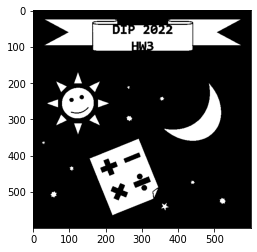

In [77]:
# to binary
sample1[sample1==255] = 1
sample1[sample1==0] = 0
plt.imshow(sample1, cmap='gray')

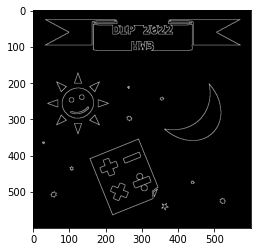

In [12]:
def extract_boundaries(src_img, H): 
    h,w = src_img.shape
    res_img = np.zeros((h,w))
    ones = H.sum()
    
    for i in range(1,h-1):
        for j in range(1,w-1):
            patch = src_img[i-1:i+2, j-1:j+2]
            if (patch*H).sum() == ones: res_img[i][j] = 1

    res_img = src_img-res_img
    return res_img

plt.imshow(extract_boundaries(sample1, np.ones((3,3))), cmap='gray')

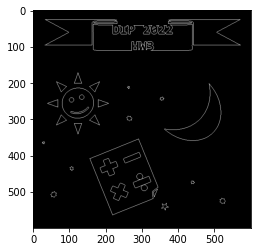

In [17]:
plt.imshow(extract_boundaries(sample1, np.array([[0,1,0],[1,1,1],[0,1,0]])), cmap='gray')

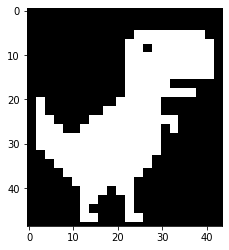

In [41]:
# to binary
dinosaur[dinosaur==255] = 1
dinosaur[dinosaur==0] = 0
plt.imshow(dinosaur, cmap='gray')

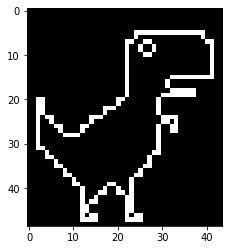

In [53]:
plt.imshow(extract_boundaries(dinosaur, np.array([[0,1,0],[1,1,1],[0,1,0]])), cmap='gray')

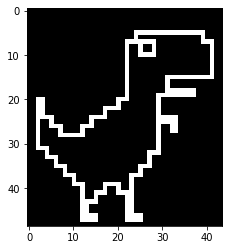

In [54]:
plt.imshow(extract_boundaries(dinosaur, np.ones((3,3))), cmap='gray')

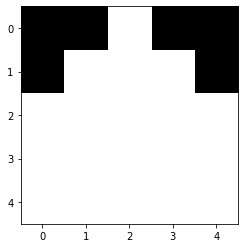

In [6]:
img = np.ones((5,5))
img[[0,0,0,0,1,1],[0,1,3,4,0,4]] = 0
plt.imshow(img, cmap='gray')

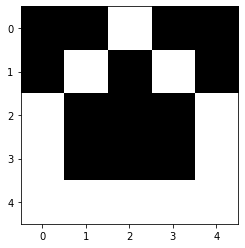

In [43]:
plt.imshow(extract_boundaries(img, np.array([[0,1,0],[1,1,1],[0,1,0]])), cmap='gray')

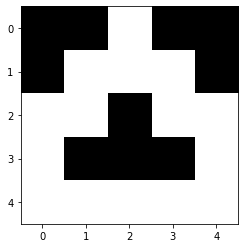

In [44]:
plt.imshow(extract_boundaries(img, np.ones((3,3))), cmap='gray')

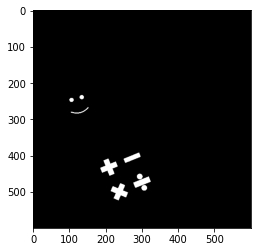

In [22]:
Fc = sample1.copy()
Fc = np.where(Fc == 1, 0, 1)

H = np.array([[0,1,0],[1,1,1],[0,1,0]])
h,w = sample1.shape
G1 = np.zeros((h,w))
# 初始化洞洞座標(9個點)
holes = ((247,104),(239,134),(281,130),(433,209),(405,274),(499,237),(458,294),(473,301),(489,305))
for hole in holes:
    G1[hole] = 1

while True:
    G2 = np.zeros((h,w))
    for i in range(1,h-1):
        for j in range(1,w-1):
            patch = G1[i-1:i+2, j-1:j+2]
            if (patch*H).sum() > 0: G2[i][j] = 1
    G2 = G2 * Fc
    if (G1==G2).all(): break
    G1 = G2
    
plt.imshow(G1, cmap='gray')

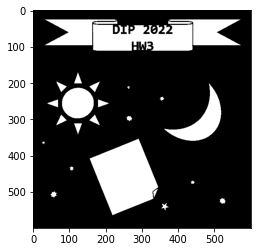

In [23]:
plt.imshow(G1+sample1, cmap='gray')

In [79]:
sample1_reverse = sample1.copy()
sample1_reverse = np.where(sample1_reverse == 1, 0, 1)

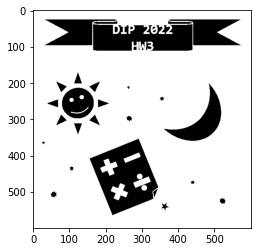

In [80]:
plt.imshow(sample1_reverse, cmap='gray')

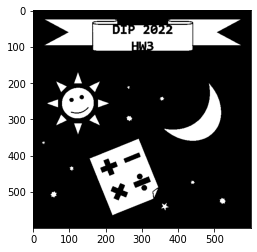

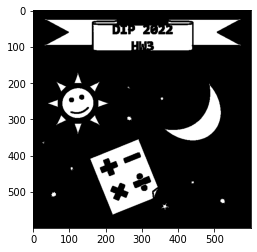

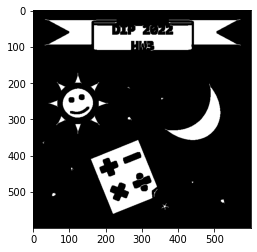

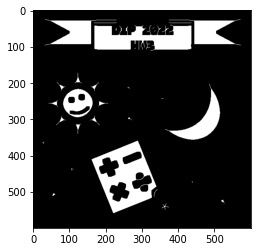

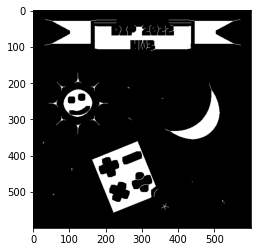

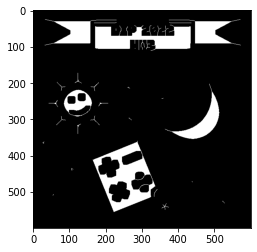

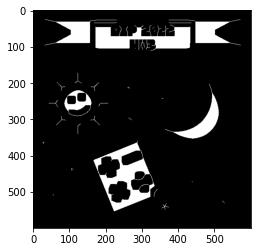

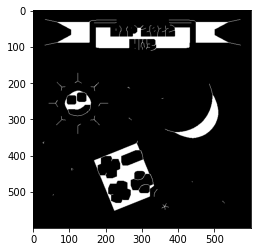

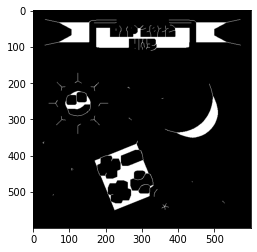

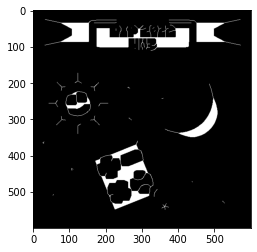

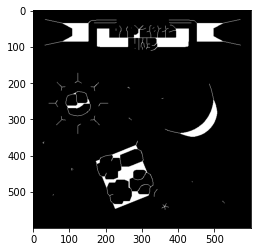

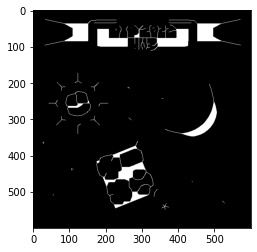

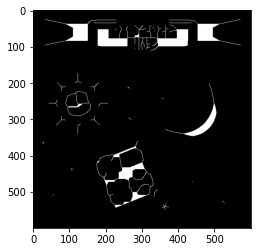

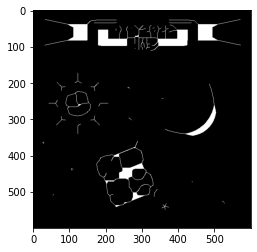

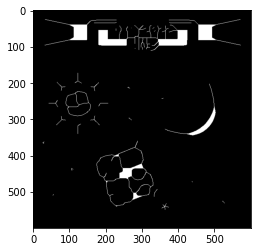

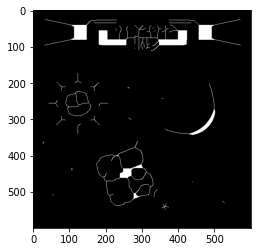

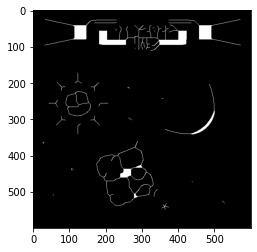

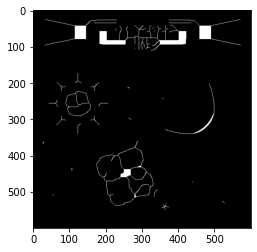

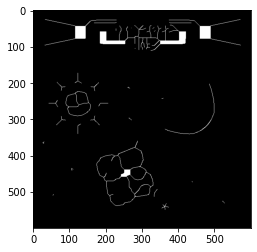

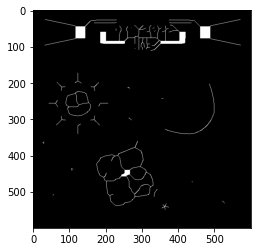

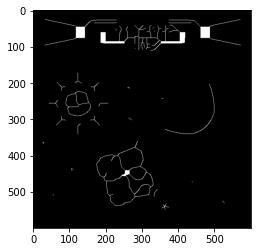

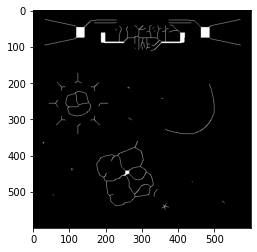

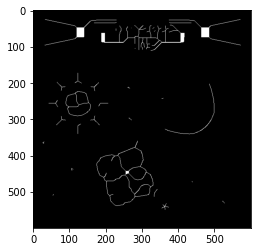

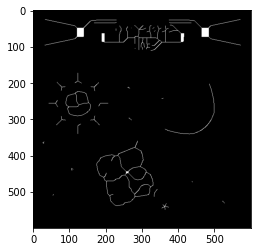

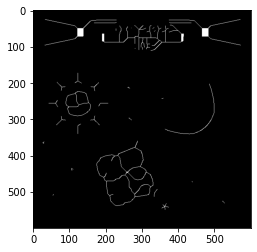

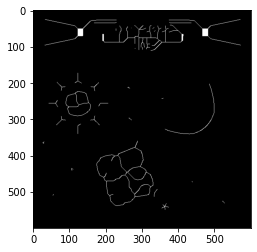

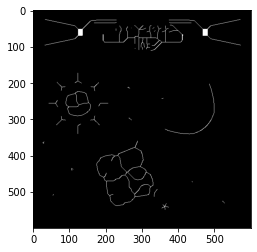

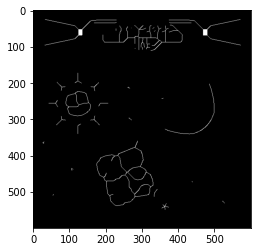

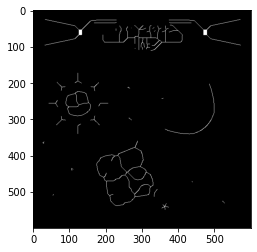

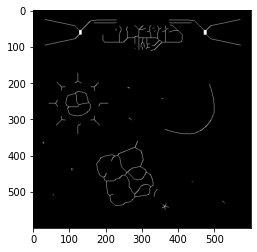

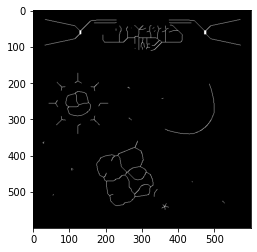

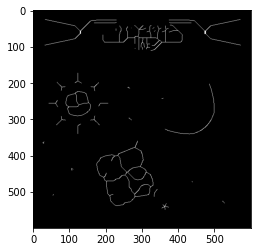

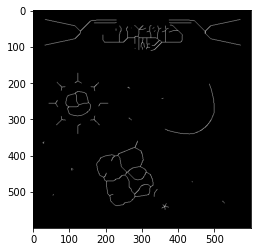

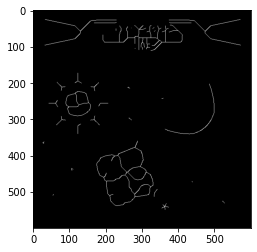

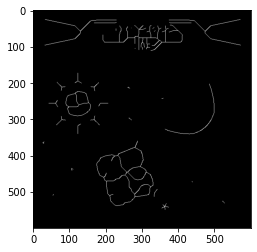

In [78]:
# https://github.com/dingmyu/thinning_Zhan-Suen/blob/master/thinning.py
import numpy as np
import cv2

def neighbours(x,y,image):
    "Return 8-neighbours of image point P1(x,y), in a clockwise order"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

def zhangSuen(image):
    "the Zhang-Suen Thinning Algorithm"
    Image_Thinned = image.copy()  # deepcopy to protect the original image
    changing1 = changing2 = 1        #  the points to be removed (set as 0)
    i=0
    while changing1 or changing2:   #  iterates until no further changes occur in the image
        plt.imshow(Image_Thinned, cmap='gray')
        plt.show()
        # Step 1
        changing1 = []
        rows, columns = Image_Thinned.shape               # x for rows, y for columns
        for x in range(1, rows - 1):                     # No. of  rows
            for y in range(1, columns - 1):            # No. of columns
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1 and    # Condition 0: Point P1 in the object regions 
                    2 <= sum(n) <= 6 and       # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and     # Condition 3: P2 , P4 , P6 中有0 L
                    P4 * P6 * P8 == 0):        # Condition 4: P4 , P6 , P8 中有0 D
                    changing1.append((x,y))
        for x, y in changing1: 
            Image_Thinned[x][y] = 0
            
        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and        # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P8 * P2 * P4 == 0 and        # Condition 3 U
                    P6 * P8 * P2 == 0):          # Condition 4 R
                    changing2.append((x,y))   
        for x, y in changing2: 
            Image_Thinned[x][y] = 0
            
    Image_Thinned[0,:] = 0
    Image_Thinned[rows-1,:]=0
    Image_Thinned[:,0] = 0
    Image_Thinned[:,columns - 1] = 0
    return Image_Thinned
 
thinning_img = zhangSuen(sample1)
cv2.imwrite("dinosaur_thin.png",thinning_img*255)
plt.imshow(thinning_img, cmap='gray')

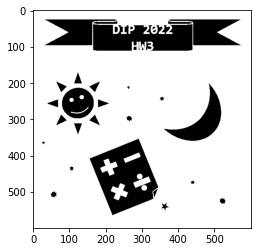

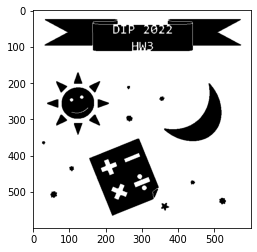

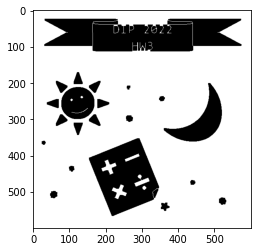

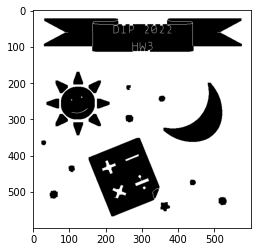

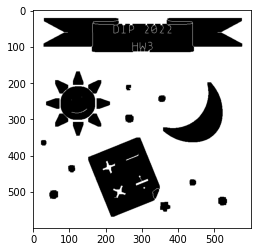

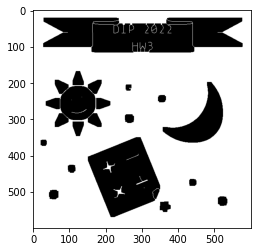

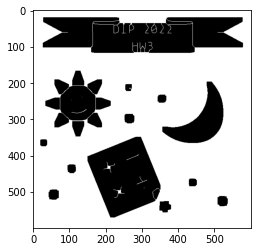

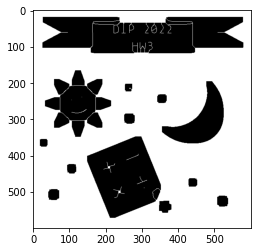

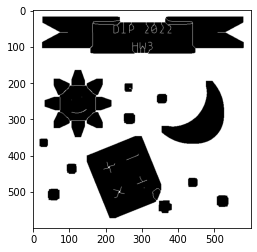

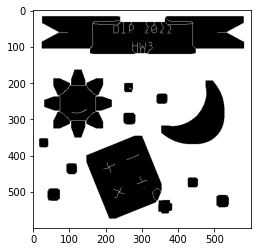

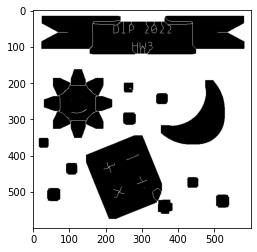

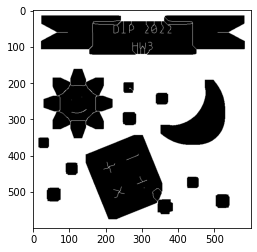

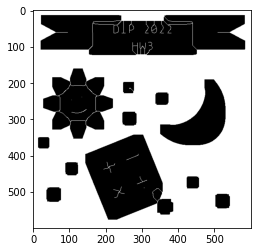

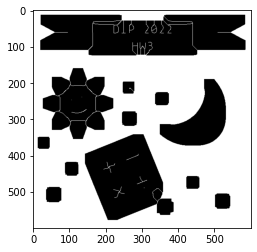

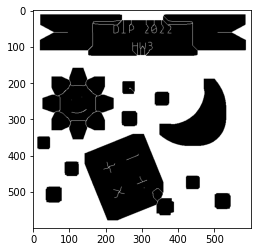

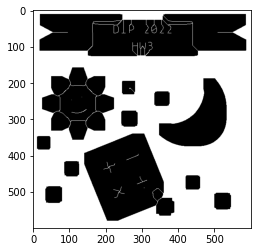

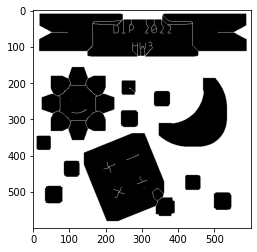

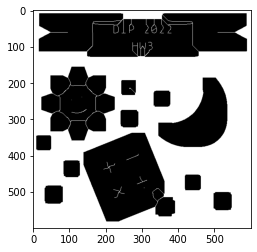

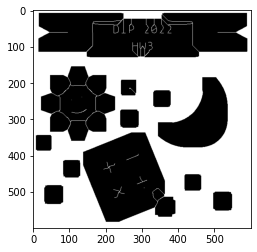

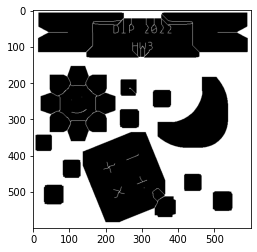

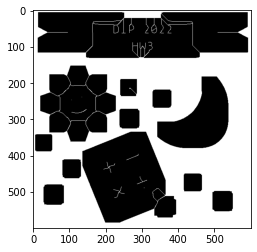

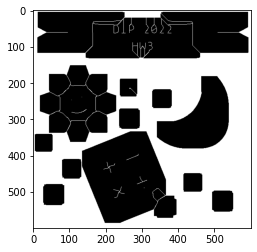

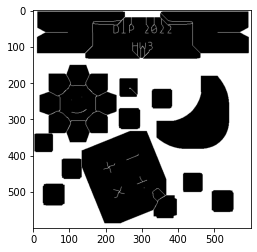

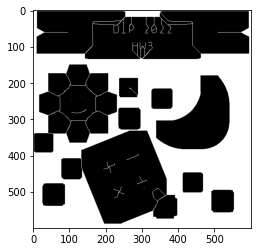

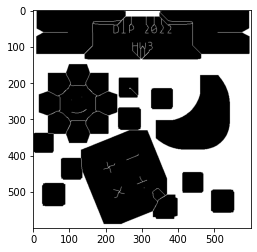

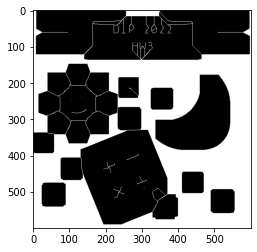

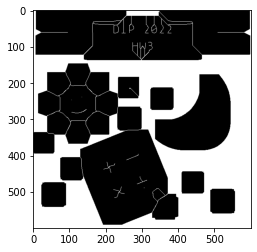

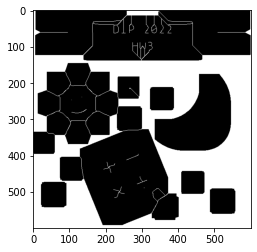

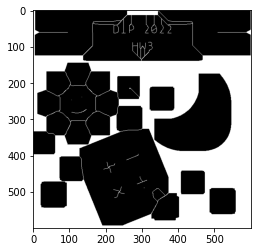

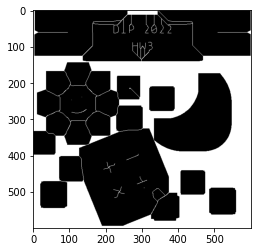

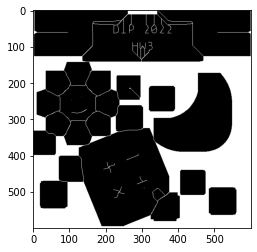

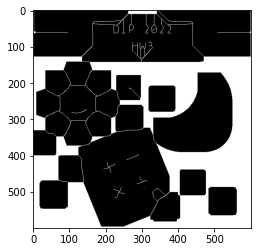

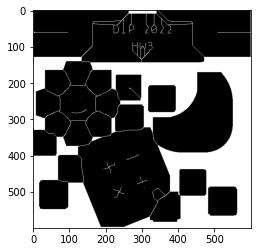

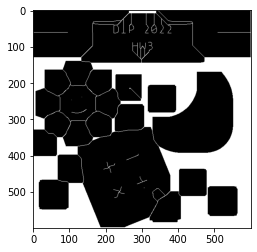

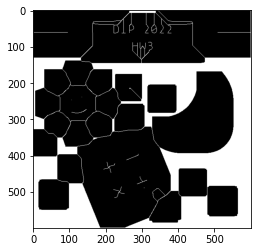

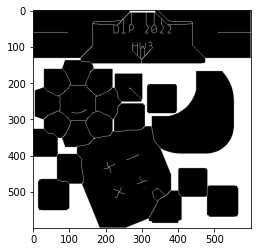

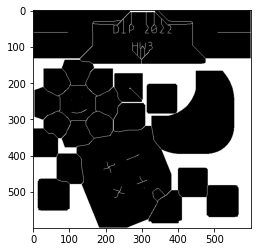

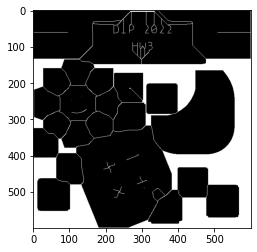

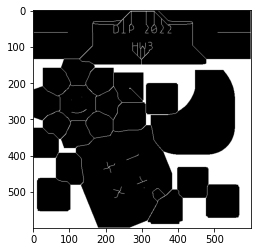

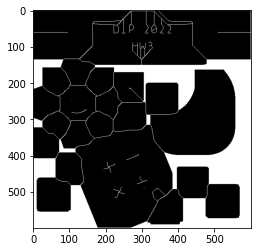

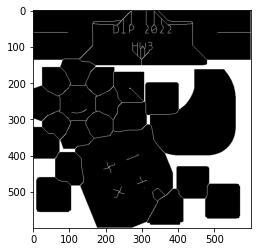

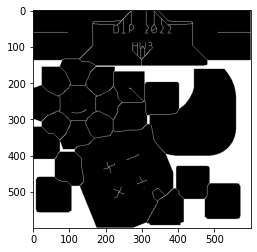

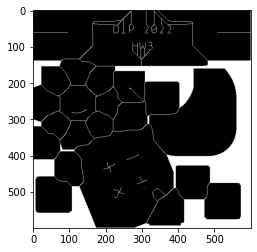

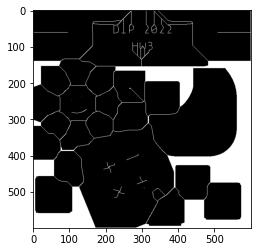

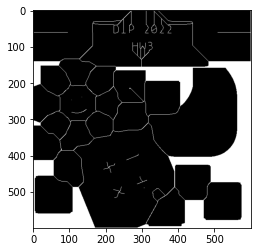

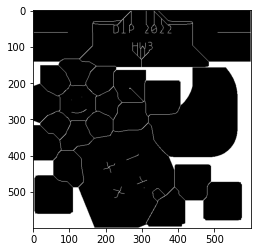

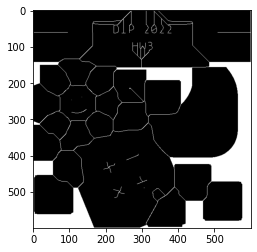

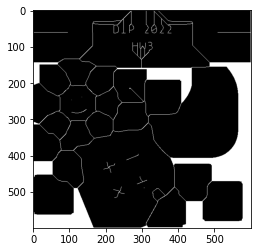

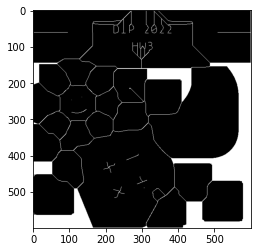

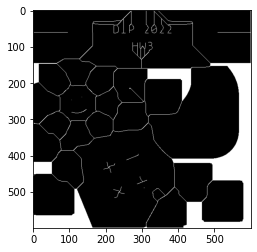

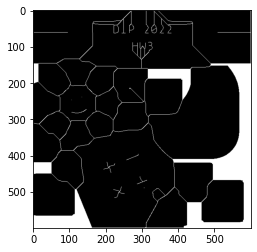

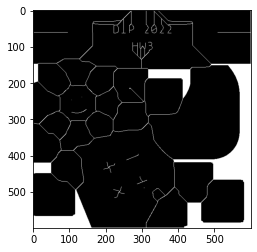

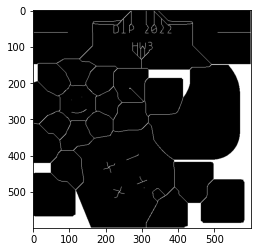

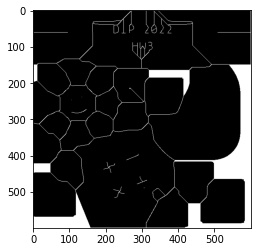

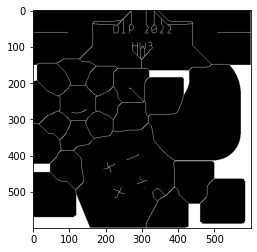

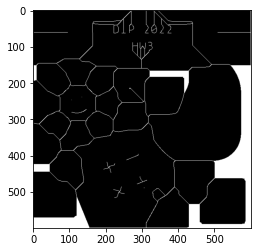

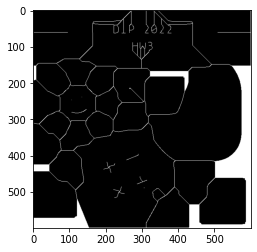

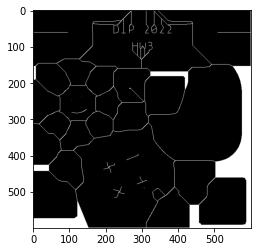

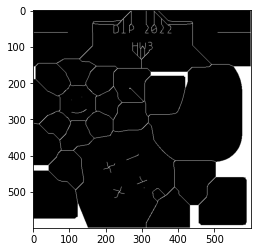

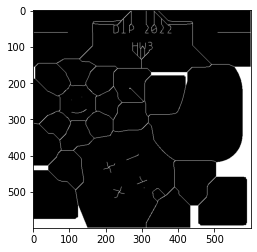

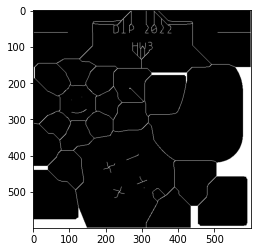

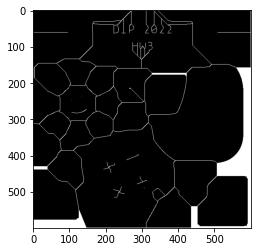

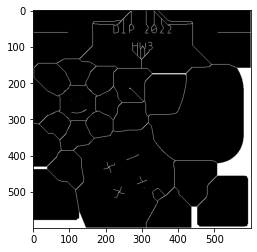

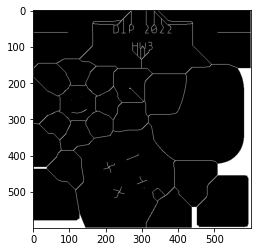

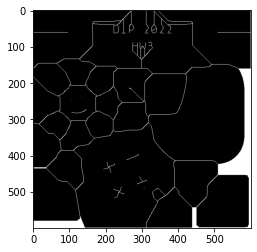

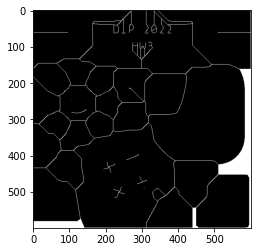

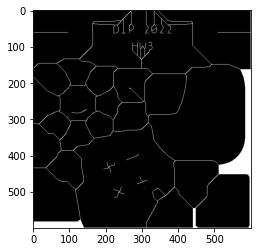

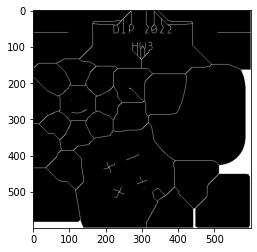

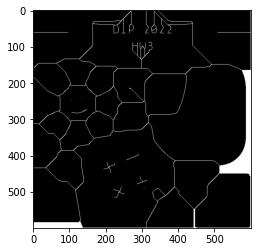

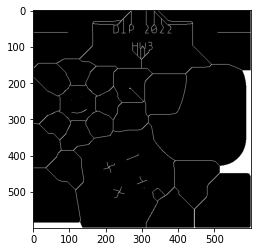

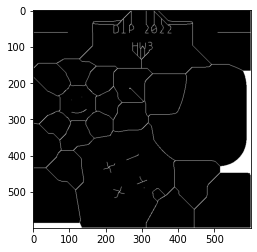

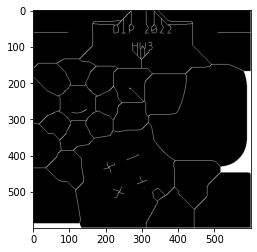

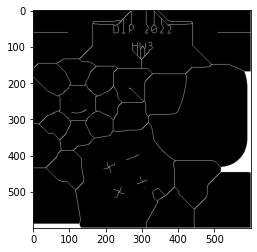

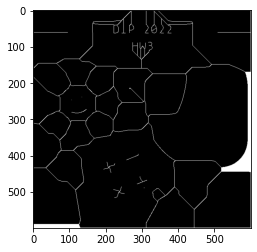

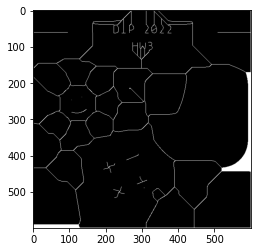

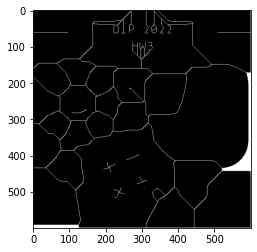

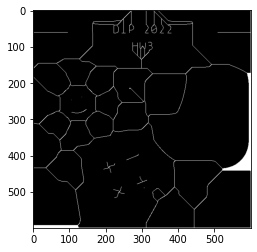

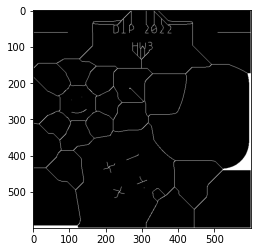

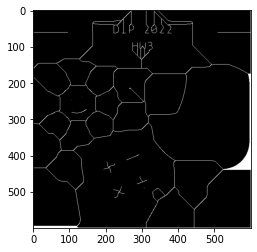

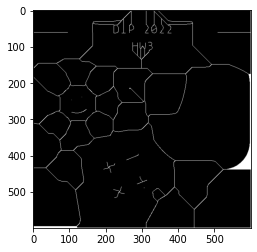

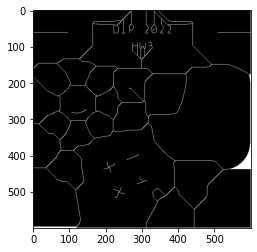

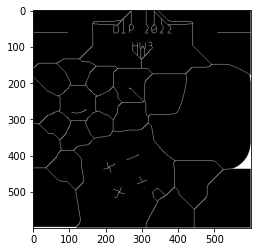

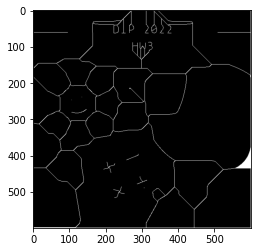

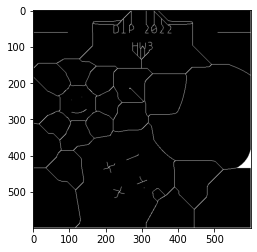

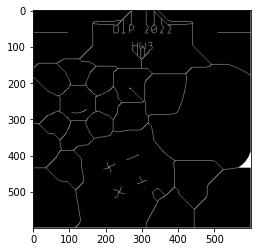

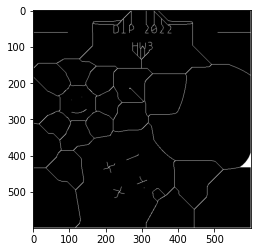

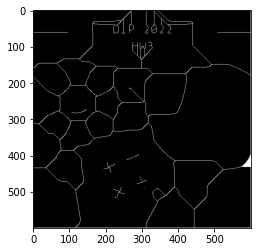

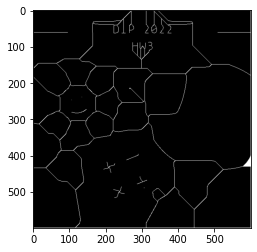

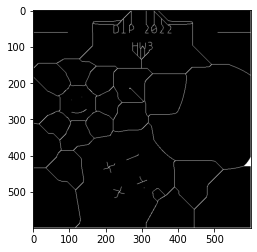

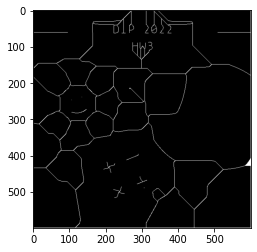

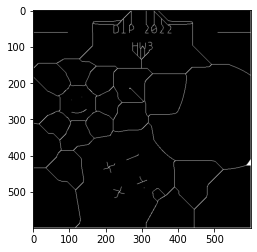

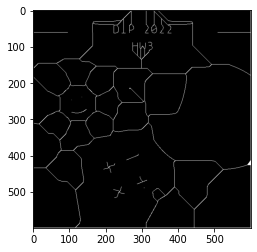

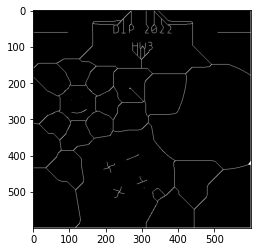

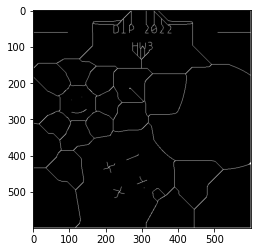

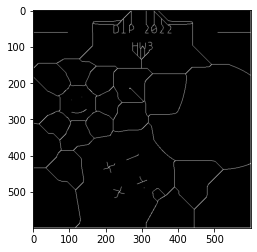

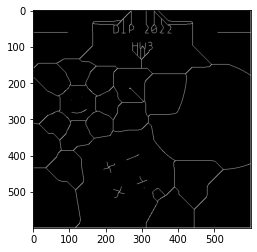

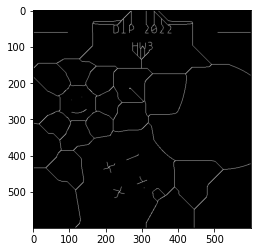

In [81]:
thinning_img = zhangSuen(sample1_reverse)
plt.imshow(thinning_img, cmap='gray')

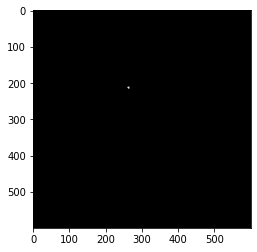

In [28]:
def find_object(F, obj_i, obj_j):
    H = np.ones((3,3))
    h,w = F.shape
    G1 = np.zeros((h,w))
    G1[obj_i, obj_j] = 1
    
    while True:
        G2 = np.zeros((h,w))
        for i in range(obj_i-1,h-1):
            # 只要一偵測到object斷開就不往下計算
            if (G1[i-1] == 0).all() and (G1[i] == 0).all() and (G1[i+1] == 0).all() and (G2 > 0).any() : break
            for j in range(1,w-1):
                patch = G1[i-1:i+2, j-1:j+2]
                if (patch*H).sum() > 0: G2[i][j] = 1
        G2 = G2 * F
        if (G1==G2).all(): break
        G1 = G2
    return G1

# test
F = sample1.copy()
result5 = np.zeros(F.shape)
G = find_object(F, 212, 262)
F = F - G
label = 2
result5 = result5 + G * label
plt.imshow(result5, cmap='gray')

1


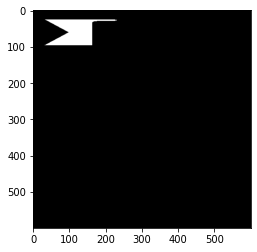

2


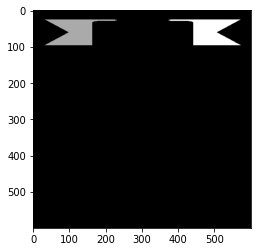

3


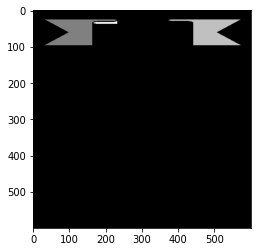

4


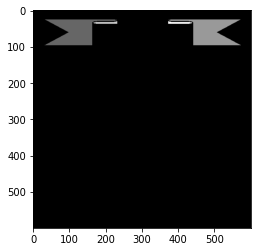

5


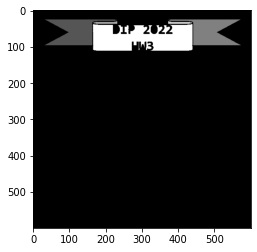

6


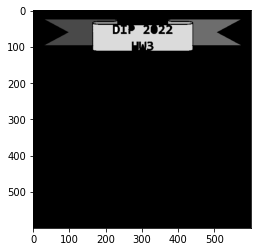

7


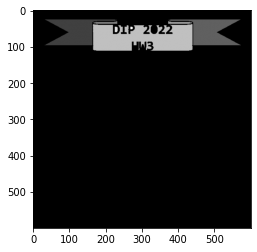

8


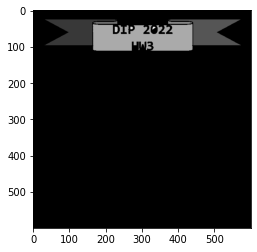

9


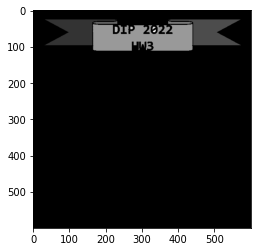

10


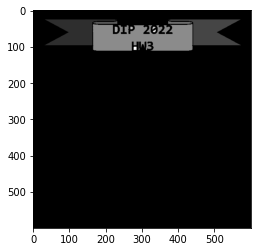

11


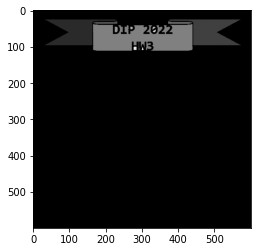

12


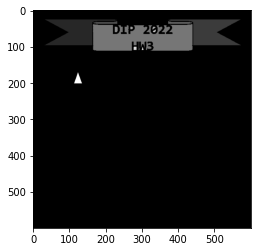

13


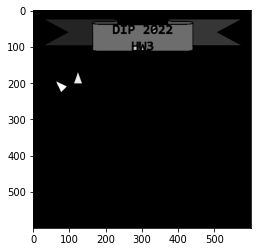

14


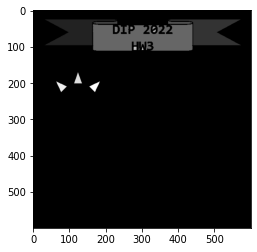

15


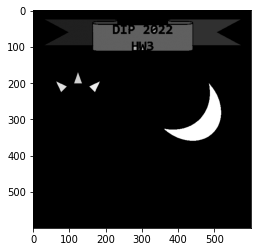

16


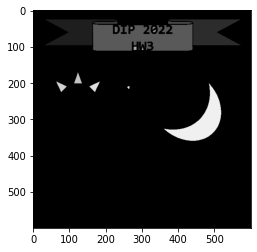

17


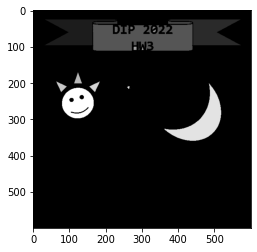

18


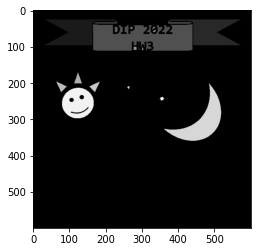

19


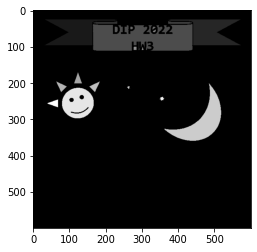

20


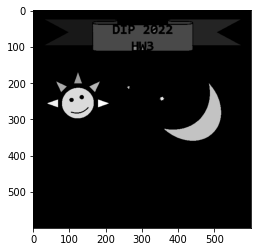

21


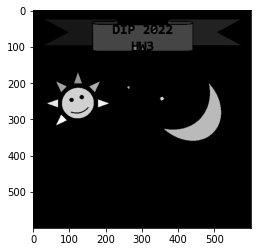

22


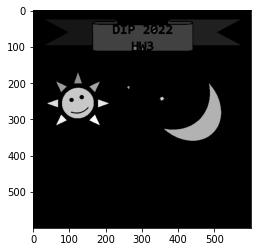

23


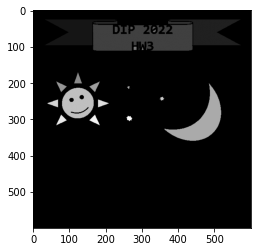

24


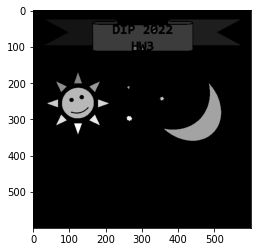

25


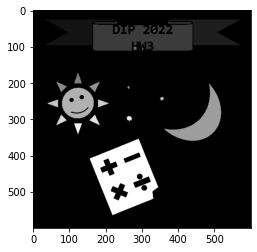

26


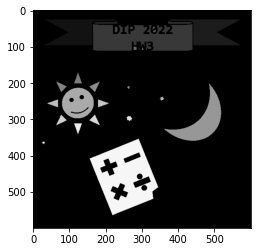

27


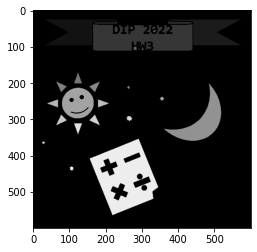

28


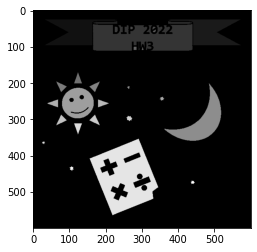

29


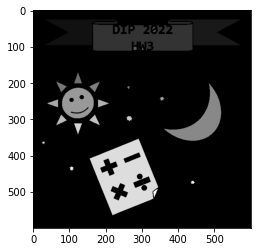

30


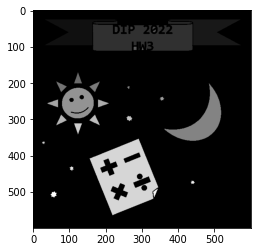

31


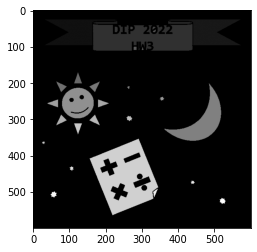

32


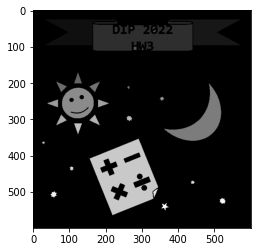

In [29]:
F = sample1.copy()
h,w = F.shape
result5 = np.zeros((h,w))
object_count = 0

for i in range(1,h-1):
        for j in range(1,w-1):
            if F[i][j] == 1: # 找到object
                object_count += 1
                # G 代表object
                G = find_object(F, i, j)
                # 將 object 從原圖去掉
                F = F - G
                # 標記 object
                label = object_count + 1
                result5 = result5 + G * label
                print(object_count)
                plt.imshow(result5, cmap='gray')
                plt.show()

In [47]:
import colorsys
import random
 
def get_n_hsl_colors(num):
    hsl_colors = []
    i = 0
    step = 360.0 / num
    while i < 360:    
        h = i
        s = 90 + random.random() * 10
        l = 50 + random.random() * 10
        _hslc = [h / 360.0, l / 100.0, s / 100.0]
        hsl_colors.append(_hslc)
        i += step
 
    return hsl_colors
 
def ncolors(num):
    rgb_colors = []
    if num < 1:
        return rgb_colors
    hsl_colors = get_n_hsl_colors(num)
    for hslc in hsl_colors:
        _r, _g, _b = colorsys.hls_to_rgb(hslc[0], hslc[1], hslc[2])
        r, g, b = [int(x * 255.0) for x in (_r, _g, _b)]
        rgb_colors.append([r, g, b])
 
    return rgb_colors

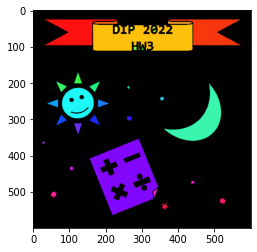

In [48]:
w,h = result5.shape
result5_color = np.zeros((h,w,3))
colors = ncolors(object_count) 
for label in range(object_count):
    result5_color[result5==label+2] = colors[label]
    
result5_color = result5_color.astype(int)
plt.imshow(result5_color.astype(int))

In [41]:
cv2.imwrite("result5.png",result5_color)

True

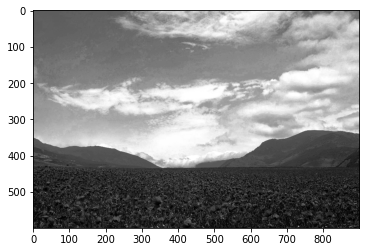

In [46]:
def globalHE(img):
    hist,bins = np.histogram(img.ravel(),256,[0,255])
    pdf = hist/img.size # 出現次數/總像素點 = 機率 = pdf
    cdf = pdf.cumsum() # 將機率利用cumsum()累加 = cdf
    equ_value = np.around(cdf * 255).astype('uint8') #將cdf乘以255(max value) ，再四捨五入取整數
    result = equ_value[img] #將原本的value數值transfer到對應的數值
    return result
HE_sample2 = globalHE(sample2)
plt.imshow(HE_sample2, cmap='gray')

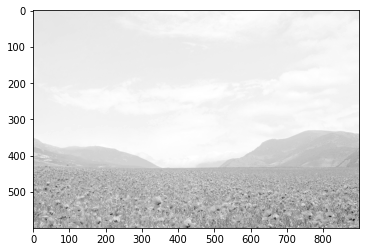

In [80]:
pow_sample2 = sample2.copy()
pow_sample2 = np.power((pow_sample2 / 255), 0.3) * 255
plt.imshow(pow_sample2, cmap='gray',vmin=0, vmax=255)

In [251]:
# Law's method
window_size = 13
F = sample2.copy()
# F = avg_sample2.copy()

H1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 36
H2 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) / 12
H3 = np.array([[-1, 2, -1], [-2, 4, -2], [-1, 2, -1]]) / 12
H4 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 12
H5 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]]) / 4
H6 = np.array([[-1, 2,-1], [0, 0, 0], [1, -2, 1]]) / 4
H7 = np.array([[-1, -2, -1], [2, 4, 2], [-1, -2, -1]]) / 12
H8 = np.array([[-1, 0, 1], [2, 0, -2], [-1, 0, 1]]) / 4
H9 = np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]) / 4
# step 1: Convolution
M1 = signal.convolve2d(F, H1, mode = "same")
M2 = signal.convolve2d(F, H2, mode = "same")
M3 = signal.convolve2d(F, H3, mode = "same")
M4 = signal.convolve2d(F, H4, mode = "same")
M5 = signal.convolve2d(F, H5, mode = "same")
M6 = signal.convolve2d(F, H6, mode = "same")
M7 = signal.convolve2d(F, H7, mode = "same")
M8 = signal.convolve2d(F, H8, mode = "same")
M9 = signal.convolve2d(F, H9, mode = "same")
# step 2: Energy computation
S = np.ones((window_size, window_size))
T1 = signal.convolve2d(M1 * M1, S, mode = "same")
T2 = signal.convolve2d(M2 * M2, S, mode = "same")
T3 = signal.convolve2d(M3 * M3, S, mode = "same")
T4 = signal.convolve2d(M4 * M4, S, mode = "same")
T5 = signal.convolve2d(M5 * M5, S, mode = "same")
T6 = signal.convolve2d(M6 * M6, S, mode = "same")
T7 = signal.convolve2d(M7 * M7, S, mode = "same")
T8 = signal.convolve2d(M8 * M8, S, mode = "same")
T9 = signal.convolve2d(M9 * M9, S, mode = "same")

# def normal(v):
#     normalized_v = (v-v.min())/(v.max()-v.min())
#     return normalized_v
# T1 = normal(T1)
# T2 = normal(T2)
# T3 = normal(T3)
# T4 = normal(T4)
# T5 = normal(T5)
# T6 = normal(T6)
# T7 = normal(T7)
# T8 = normal(T8)
# T9 = normal(T9)

# cv2.imwrite("T1.png", T1/np.max(T1)*255)
# cv2.imwrite("T2.png", T2/np.max(T2)*255)
# cv2.imwrite("T3.png", T3/np.max(T3)*255)
# cv2.imwrite("T4.png", T4/np.max(T4)*255)
# cv2.imwrite("T5.png", T5/np.max(T5)*255)
# cv2.imwrite("T6.png", T6/np.max(T6)*255)
# cv2.imwrite("T7.png", T7/np.max(T7)*255)
# cv2.imwrite("T8.png", T8/np.max(T8)*255)
# cv2.imwrite("T9.png", T9/np.max(T9)*255)

local_feature = np.stack([T1, T2, T3, T4, T5, T6, T7, T8, T9]) #(9, 600, 900)
law_method = np.moveaxis(local_feature, 0, -1) #(600, 900, 9)


In [260]:
M4

array([[-4.44166667e+01, -5.92500000e+01, -5.93333333e+01, ...,
        -6.41666667e+01, -6.44166667e+01, -4.83333333e+01],
       [-3.33333333e-01, -5.00000000e-01, -4.16666667e-01, ...,
         8.33333333e-02,  1.66666667e-01,  8.33333333e-02],
       [-8.33333333e-02, -3.55271368e-15,  2.50000000e-01, ...,
         4.16666667e-01,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 4.91666667e+00,  5.58333333e+00,  8.41666667e+00, ...,
        -1.50000000e+01, -2.65000000e+01, -1.28333333e+01],
       [ 5.83333333e-01,  4.41666667e+00,  7.25000000e+00, ...,
         7.33333333e+00, -9.58333333e+00, -1.90000000e+01],
       [ 7.08333333e+00,  1.00833333e+01,  1.24166667e+01, ...,
         2.99166667e+01,  4.65833333e+01,  3.15000000e+01]])

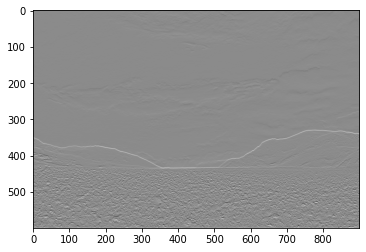

In [259]:
plt.imshow(M4, cmap='gray')

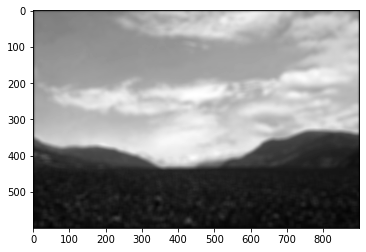

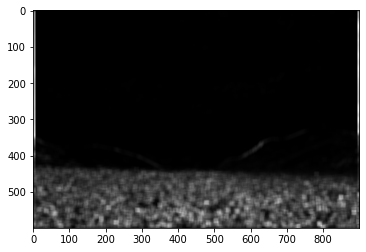

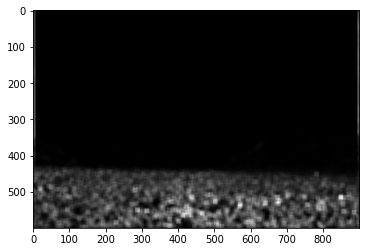

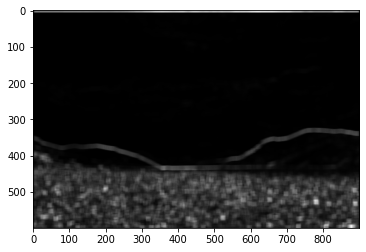

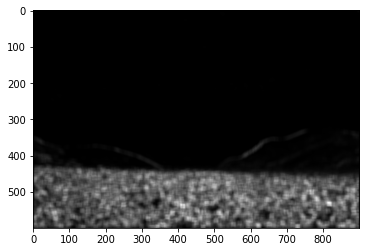

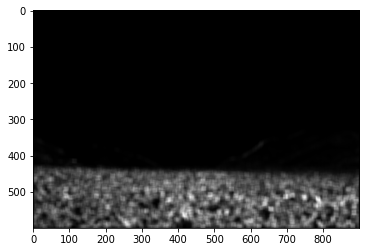

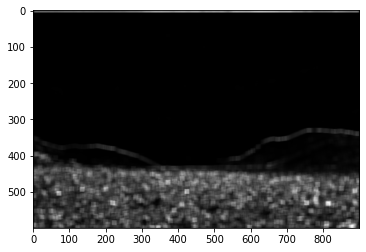

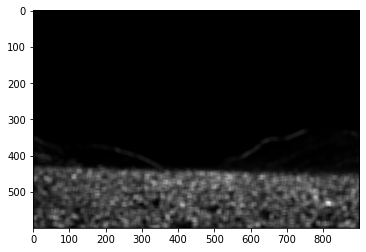

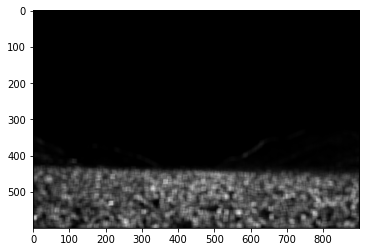

In [254]:
for T in local_feature:
    plt.imshow(T, cmap='gray')
    plt.show()

In [179]:
# k-means algorithm: https://gist.github.com/tvwerkhoven/4fdc9baad760240741a09292901d3abd
def kMeans(X, K, iterations):
    # Select k vectors as the initial centroids
    centroids = X[np.random.choice(np.arange(len(X)), K)]
    for i in range(iterations):
        # 找出與centroids距離最相近的向量(相減平方最小)
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        print(np.unique(C))
        # check if there are fewer than K clusters.(如果centroids有重複就有可能發生)
        if(len(np.unique(C)) < K):
            centroids = X[np.random.choice(np.arange(len(X)), K)]
        else: #以平均向量作為中心點
            centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return C

cluster = kMeans(law_method.reshape(-1, 9), 4, 10)
cluster = cluster.reshape(law_method.shape[0], law_method.shape[1])
result6 = np.zeros((cluster.shape[0], cluster.shape[1], 3))

[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]


Problem 2 (b) done.


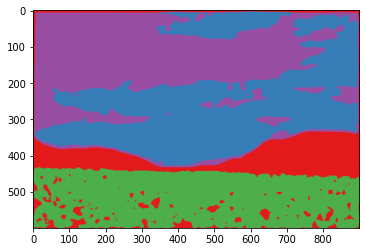

In [180]:
# output color image
for cluster_index in np.unique(cluster):
    position = np.argwhere(cluster == cluster_index)
    result6[position[:, 0], position[:, 1], :] = np.array((plt.cm.Set1(cluster_index)[0], plt.cm.Set1(cluster_index)[1], plt.cm.Set1(cluster_index)[2])) * 255
cv2.imwrite("result3.png", result6)
print("Problem 2 (b) done.")
plt.imshow(result6/255)

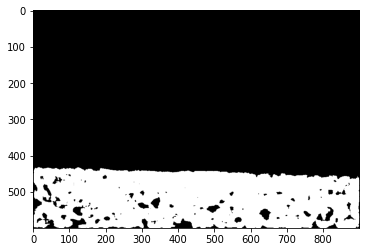

In [176]:
counts = np.bincount(cluster[500,400:500])
#返回眾數
label = np.argmax(counts)
# print(label)
                  
mask = np.where(cluster == label, 1, 0)
plt.imshow(mask, cmap='gray')

In [161]:
import random
def quilt_random(sample, out_size, patch_size):
    """
    Randomly samples square patches of size patchsize from sample in order to create an output image of size outsize.

    :param sample: numpy.ndarray   The image you read from sample directory
    :param out_size: int            The width of the square output image
    :param patch_size: int          The width of the square sample patch
    :return: numpy.ndarray
    """
    
    # Find the dimensions of the sample image
    sample_rows, sample_cols = sample.shape
    
    # Find a random starting point to create patch
    random_row = int(round(random.random() * (sample_rows - patch_size)))
    random_col = int(round(random.random() * (sample_cols - patch_size)))
    
    # Create patch
    patch = np.zeros((patch_size,patch_size), np.uint8)
    for row in range(patch_size):
        for col in range(patch_size):
            patch[row][col] = sample[random_row + row][random_col + col]

    # Number of patches that fit across output image
    patch_copies = int(out_size/patch_size)

    
    # Create output image
    out = np.zeros((out_size,out_size), np.uint8)
    for row in range(0, patch_copies*patch_size, patch_size):
            for col in range(0, patch_copies*patch_size, patch_size):
                
                random_row = int(round(random.random() * (sample_rows - patch_size)))
                random_col = int(round(random.random() * (sample_cols - patch_size)))
                
                patch = np.zeros((patch_size,patch_size), np.uint8)
                for i in range(patch_size):
                    for j in range(patch_size):
                        patch[i][j] = sample[random_row + i][random_col + j]
                        
                for i in range(patch_size):
                    for j in range(patch_size):
                        out[row+i][col+j] = patch[i][j]

    return out

sample3_texture = quilt_random(sample3, 900, 10)
sample3_texture = sample3_texture[:600,:900]

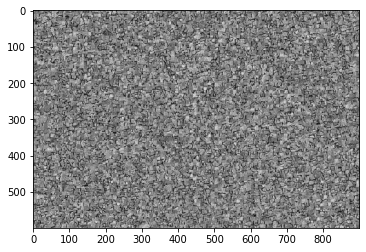

In [162]:
plt.imshow(sample3_texture, cmap='gray')

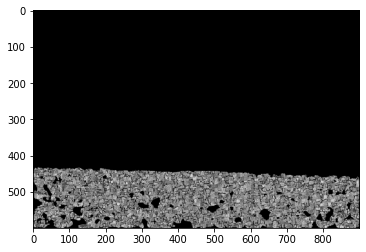

In [169]:
sample3_texture = sample3_texture*mask
plt.imshow(sample3_texture, cmap='gray')

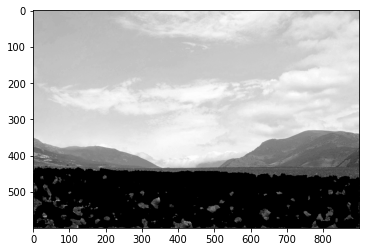

In [167]:
result8 = sample2.copy()
result8[cluster == label] = 0
plt.imshow(result8, cmap='gray')

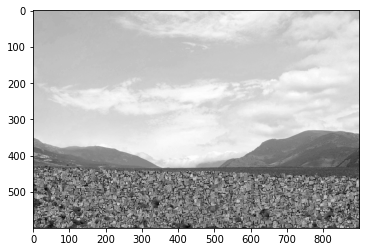

In [174]:
result8 = result8 + sample3_texture
plt.imshow(result8, cmap='gray')

In [175]:
cv2.imwrite("result8.png", result8)

True

In [296]:
def convolve2d(F, kernel_filter): # in same place
    img = F.copy()
    kernel_size = kernel_filter.shape[0]
    gap = kernel_size // 2
    pad_img = np.lib.pad(img,(gap,gap),'constant')
    res_img = np.zeros((pad_img.shape))
    
    height, width = pad_img.shape
    for i in range(gap, height - gap):
        for j in range(gap, width - gap):
            patch = pad_img[i-gap:i+gap+1,j-gap:j+gap+1] * kernel_filter
            res_img[i][j] = patch.sum()

    return res_img[gap:height-gap,gap:width-gap] # clip padding

In [304]:
print('start Law\'s method')
# Law's method
window_size = 13
F = sample2.copy().astype(np.float64)

H1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 36
H2 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) / 12
H3 = np.array([[-1, 2, -1], [-2, 4, -2], [-1, 2, -1]]) / 12
H4 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 12
H5 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]]) / 4
H6 = np.array([[-1, 2,-1], [0, 0, 0], [1, -2, 1]]) / 4
H7 = np.array([[-1, -2, -1], [2, 4, 2], [-1, -2, -1]]) / 12
H8 = np.array([[-1, 0, 1], [2, 0, -2], [-1, 0, 1]]) / 4
H9 = np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]) / 4
# step 1: Convolution
M1 = convolve2d(F, H1)
M2 = convolve2d(F, H2)
M3 = convolve2d(F, H3)
M4 = convolve2d(F, H4)
M5 = convolve2d(F, H5)
M6 = convolve2d(F, H6)
M7 = convolve2d(F, H7)
M8 = convolve2d(F, H8)
M9 = convolve2d(F, H9)
# step 2: Energy computation
S = np.ones((window_size, window_size))
T1 = convolve2d(M1 * M1, S)
T2 = convolve2d(M2 * M2, S)
T3 = convolve2d(M3 * M3, S)
T4 = convolve2d(M4 * M4, S)
T5 = convolve2d(M5 * M5, S)
T6 = convolve2d(M6 * M6, S)
T7 = convolve2d(M7 * M7, S)
T8 = convolve2d(M8 * M8, S)
T9 = convolve2d(M9 * M9, S)
    
local_feature = np.stack([T1, T2, T3, T4, T5, T6, T7, T8, T9]) #(9, 600, 900)
law_method = np.moveaxis(local_feature, 0, -1) #(600, 900, 9)

# k-means algorithm: https://gist.github.com/tvwerkhoven/4fdc9baad760240741a09292901d3abd
def kMeans(X, K, iterations):
    # Select k vectors as the initial centroids
#     centroids = X[np.random.choice(np.arange(len(X)), K)]
    #為求穩定所以初始化中心點
    centroids = X[[90100,90800,360800,450500]]
    for i in range(iterations):
        # 找出與centroids距離最相近的向量(相減平方最小)
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # check if there are fewer than K clusters.(如果centroids有重複就有可能發生)
        if(len(np.unique(C)) < K):
            centroids = X[np.random.choice(np.arange(len(X)), K)]
        else: #以平均向量作為中心點
            centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return C

cluster = kMeans(law_method.reshape(-1, 9), 4, 10)
cluster = cluster.reshape(law_method.shape[0], law_method.shape[1])
result6 = np.zeros((cluster.shape[0], cluster.shape[1], 3))

# output color image
for cluster_index in np.unique(cluster):
    position = np.argwhere(cluster == cluster_index)
    result6[position[:, 0], position[:, 1], :] = np.array((plt.cm.Set1(cluster_index)[0], plt.cm.Set1(cluster_index)[1], plt.cm.Set1(cluster_index)[2])) * 255
result6 = result6.astype(np.uint8)

# improve
def normal(v):
    normalized_v = (v-v.min())/(v.max()-v.min())
    return normalized_v
T1 = normal(T1)
T2 = normal(T2)
T3 = normal(T3)
T4 = normal(T4)
T5 = normal(T5)
T6 = normal(T6)
T7 = normal(T7)
T8 = normal(T8)
T9 = normal(T9)

local_feature2 = np.stack([T1, T2, T3, T4, T5, T6, T7, T8, T9]) #(9, 600, 900)
law_method2 = np.moveaxis(local_feature2, 0, -1) #(600, 900, 9)

cluster2 = kMeans(law_method2.reshape(-1, 9), 4, 10)
cluster2 = cluster2.reshape(law_method2.shape[0], law_method2.shape[1])
result7 = np.zeros((cluster2.shape[0], cluster2.shape[1], 3))

# output color image
for cluster_index in np.unique(cluster2):
    position = np.argwhere(cluster2 == cluster_index)
    result7[position[:, 0], position[:, 1], :] = np.array((plt.cm.Set1(cluster_index)[0], plt.cm.Set1(cluster_index)[1], plt.cm.Set1(cluster_index)[2])) * 255
result7 = result7.astype(np.uint8)

start Law's method


In [306]:
# [100,100] [100,800] [400,800] [500,500]
# [90100,90800,360800,450500]

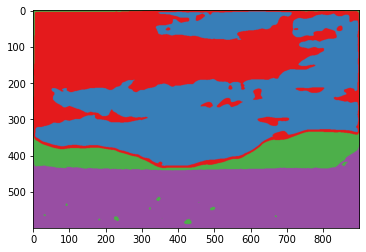

In [307]:
plt.imshow(result6)

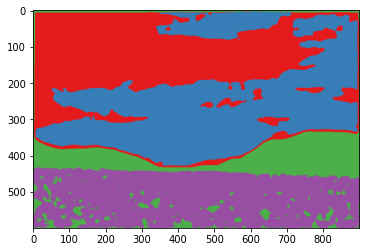

In [308]:
plt.imshow(result7)